SVM mencari decision boundary yang dapat memisahkan antar class dengan baik

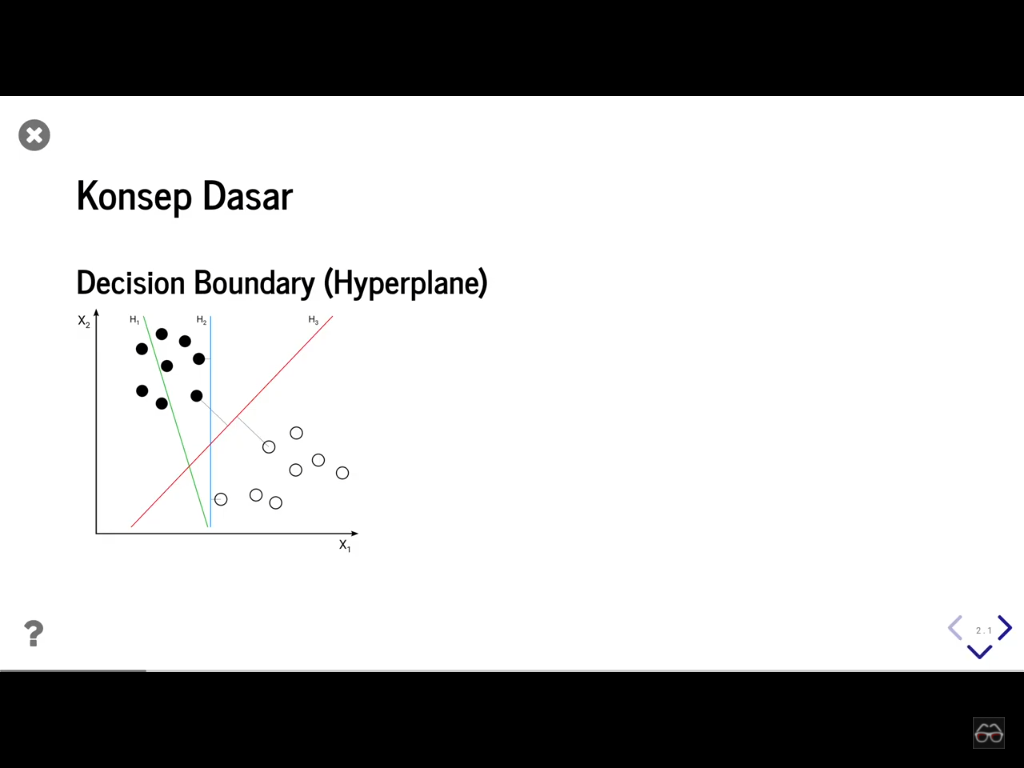

Margin ditentukan berdasarkan jarak terdekat antara decision boundary dengan anggota dari class yang ingin dipisahkan

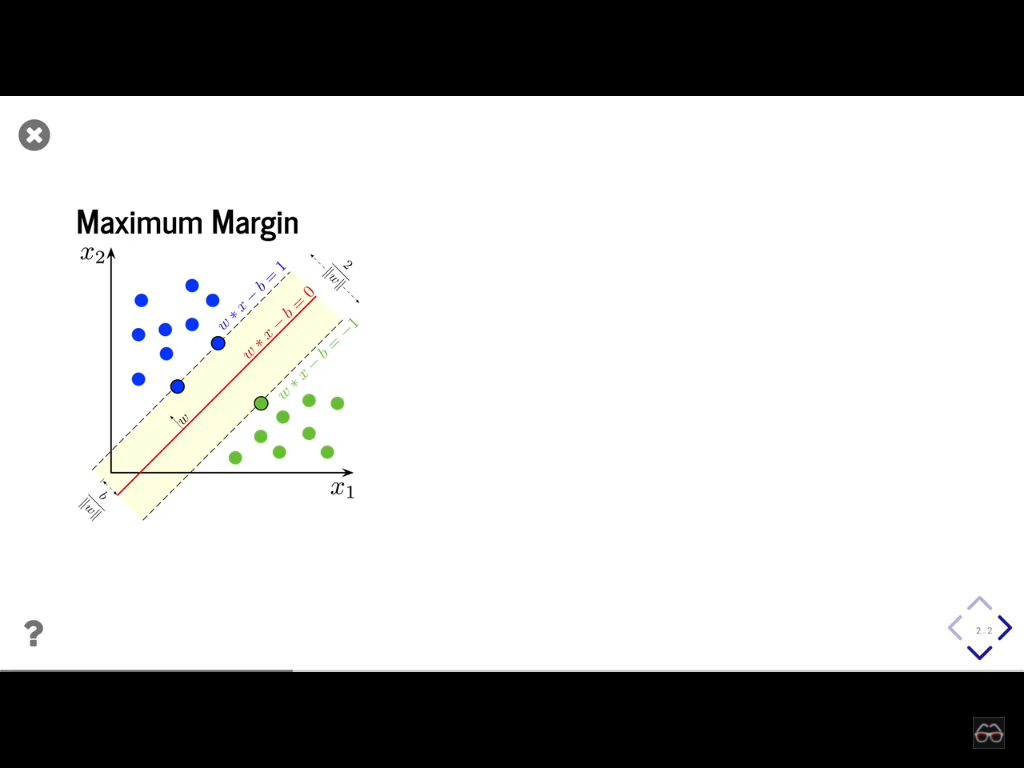

Ada beberapa class yang tidak bisa dipisahkan dengan garis linear

untuk kasus tersebut svm akan memproyeksikan data yang ada ke dimensi yang lebih tinggi artinya svm akan memproyeksikannya ke 3 dimensi. kedua class bisa dipisahkan lebih mudah yaitu dengan decision boundary dengan bidang datar. untuk memroyeksikan data ke dimensi yang lebih tinggi tentunya akan berimbas pada kenaikan beban komputasi, untuk solusinya menggunakan teknik kernel tricks.

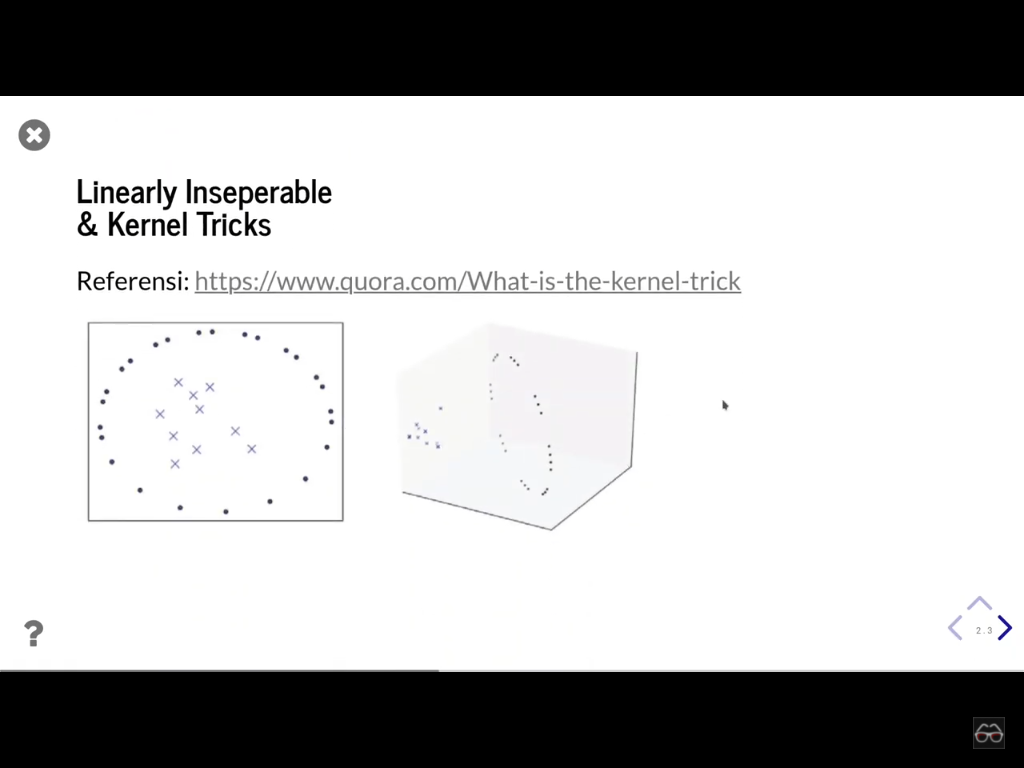

# Dataset: The MNIST database of handwritten digits

In [2]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', data_home='./dataset/mnist', return_X_y=True)
X.shape

(70000, 784)

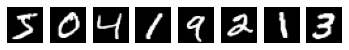

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

pos = 1
X = np.array(X)
for data in X[:8]:
    plt.subplot(1, 8, pos)
    plt.imshow(data.reshape((28,28)), cmap=cm.Greys_r)
    plt.axis('off')
    pos += 1
    
plt.show()

In [4]:
y[:8]

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [5]:
X_train = X[:1000]
y_train = y[:1000]
X_test = X[69000:]
y_test = y[69000:]

# Classification dengan SVC (Support Vector Classifier)

In [6]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(X_train, y_train)


SVC(random_state=0)

In [7]:
#evaluasi performa
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       102
           1       0.97      0.99      0.98       119
           2       0.85      0.82      0.84        99
           3       0.97      0.87      0.92       102
           4       0.88      0.95      0.91        92
           5       0.91      0.86      0.88        85
           6       0.93      0.95      0.94       102
           7       0.92      0.94      0.93       115
           8       0.89      0.94      0.91        94
           9       0.92      0.84      0.88        90

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000



# Hyperparameter Tuning dengan GridSearchCV

* parameter yang digunakan untuk mengatur proses dari suatu model dikenal dengan istilah Hyperparameter.

* proses untuk mencari komposisi nilai optimum dari hyperparameter dikenal dengan istilah hyperparameter tuning/hyperparameter optimization

In [8]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': ['rbf', 'poly', 'signoid'],
    'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=SVC(random_state=0),
                          param_grid=parameters,
                          n_jobs=6, #menjalankan proses secara paralel pada 6 Thread dari prosesor
                          verbose=1, #ketika proses berjalan mendapat feedback yang cukup informatif
                          scoring='accuracy') #nilai pembanding adalah accuracy

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueEr

GridSearchCV(estimator=SVC(random_state=0), n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'signoid']},
             scoring='accuracy', verbose=1)

In [14]:
print(f'Best Score: {grid_search.best_score_}')

best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameters:')

for param in parameters:
    print(f'\t{param}: {best_params[param]}')

Best Score: 0.907
Best Parameters:
	kernel: rbf
	C: 10
	gamma: scale


# Predict & Evaluate

In [15]:
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       102
           1       0.98      0.99      0.98       119
           2       0.87      0.85      0.86        99
           3       0.99      0.89      0.94       102
           4       0.91      0.95      0.93        92
           5       0.92      0.89      0.90        85
           6       0.93      0.94      0.94       102
           7       0.93      0.93      0.93       115
           8       0.89      0.95      0.92        94
           9       0.92      0.88      0.90        90

    accuracy                           0.93      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.93      0.93      0.93      1000

